# Initial Messaround
## June 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from src.utils import *
from src.plotting import Baseball_Field
from src.game import Game

In [2]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# this is a mapping from players to teams

team_info_df = pd.read_csv("data/team_info.csv")

In [4]:
team_info_df.shape

(1039, 3)

In [5]:
team_info_df.head()

,team_id,player_id,team_year
0,TeamA1,1059,1902
1,TeamA1,1171,1902
2,TeamA1,1177,1902
3,TeamA1,1181,1902
4,TeamA1,1195,1902


In [6]:
# "1900_02_TeamKJ_TeamB" is what I have been working with so far

which_game = "1903_01_TeamNE_TeamA2" # "1900_02_TeamKJ_TeamB" # "1903_01_TeamNE_TeamA2"

In [7]:
# this is 1 indexed, ew

game_info_df = pd.read_csv("data/game_info/game_info-" + which_game + ".csv", index_col=0)

In [8]:
game_info_df.head(10)

,game_str,home_team,away_team,at_bat,play_per_game,inning,top_bottom_inning,pitcher,catcher,first_base,second_base,third_base,shortstop,left_field,center_field,right_field,batter,first_baserunner,second_baserunner,third_baserunner
1,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,1,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
2,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,2,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
3,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,3,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
4,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,4,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
5,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,1,5,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,4474,0,0,0
6,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,6,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
7,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,7,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
8,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,8,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
9,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,9,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0
10,1903_01_TeamNE_TeamA2,TeamA2,TeamNE,2,10,1,Top,2171,2790,2526,2053,2382,1972,1557,1751,2973,3790,4474,0,0


In [9]:
game_info_df[game_info_df["at_bat"].notnull()].shape

(323, 20)

In [10]:
game_events_df = pd.read_csv("data/game_events/game_events-" + which_game + ".csv", index_col=0)


game_events_df["event"] = game_events_df["event_code"].map(lambda x: EVENT_CODE_TO_DESC[x])

In [11]:
game_events_df.head()

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
1,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch
2,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired
3,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play
4,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch
5,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired


In [12]:
game_events_df[game_events_df["at_bat"].notnull()]

,game_str,play_id,at_bat,play_per_game,timestamp,player_position,event_code,event
1,1903_01_TeamNE_TeamA2,1,1,1,19199,1,1,pitch
2,1903_01_TeamNE_TeamA2,1,1,1,19661,2,2,ball acquired
3,1903_01_TeamNE_TeamA2,1,1,1,19661,0,5,end of play
4,1903_01_TeamNE_TeamA2,2,1,2,29858,1,1,pitch
5,1903_01_TeamNE_TeamA2,2,1,2,30320,2,2,ball acquired
...,...,...,...,...,...,...,...,...
1254,1903_01_TeamNE_TeamA2,326,84,327,10930990,255,16,ball bounce
1255,1903_01_TeamNE_TeamA2,326,84,327,10931419,5,2,ball acquired
1256,1903_01_TeamNE_TeamA2,326,84,327,10932706,5,3,throw (ball-in-play)
1257,1903_01_TeamNE_TeamA2,326,84,327,10933696,3,2,ball acquired


In [13]:
#player_pos_df = pd.read_csv("data/player_pos/TeamB/player_pos-1900_TeamB/player_pos-" + which_game + ".csv", index_col=0)
"1903_01_TeamNE_TeamA2"

player_pos_df = pd.read_csv("data/player_pos/TeamA2/player_pos-1903_TeamA2/player_pos-" + which_game + ".csv", index_col=0)

print(player_pos_df.shape)

(626289, 6)


In [14]:
player_pos_df.head()

,game_str,play_id,timestamp,player_position,field_x,field_y
1,1903_01_TeamNE_TeamA2,1,19199,1,0.4377,59.9220
2,1903_01_TeamNE_TeamA2,1,19232,1,0.4410,59.9139
3,1903_01_TeamNE_TeamA2,1,19265,1,0.4446,59.9064
4,1903_01_TeamNE_TeamA2,1,19298,1,0.4482,59.8992
5,1903_01_TeamNE_TeamA2,1,19331,1,0.4521,59.8917


In [15]:
ball_pos_df = pd.read_csv("data/ball_pos/ball_pos-" + which_game + ".csv", index_col=0)
print(ball_pos_df.shape)

(14258, 6)


In [16]:
ball_pos_df

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z
1,1903_01_TeamNE_TeamA2,1,19199,-2.387367,54.2868,6.37134
2,1903_01_TeamNE_TeamA2,1,19232,-2.274918,49.9272,6.29283
3,1903_01_TeamNE_TeamA2,1,19265,-2.175885,45.5967,6.19611
4,1903_01_TeamNE_TeamA2,1,19298,-2.090271,41.2950,6.08118
5,1903_01_TeamNE_TeamA2,1,19331,-2.018073,37.0221,5.94801
...,...,...,...,...,...,...
14254,1903_01_TeamNE_TeamA2,326,10933564,49.362600,71.1342,5.61570
14255,1903_01_TeamNE_TeamA2,326,10933597,52.424700,70.1736,5.24322
14256,1903_01_TeamNE_TeamA2,326,10933630,55.468200,69.2112,4.84002
14257,1903_01_TeamNE_TeamA2,326,10933663,58.492500,68.2467,4.40613


In [17]:
# find a play where they throw the ball more that once

event_counts_df = pd.DataFrame(game_events_df[["play_id", "event_code"]].groupby("event_code").value_counts())

In [18]:
event_counts_df.loc[2]

,0
play_id,
112,3
149,3
230,3
124,3
125,3
...,...
64,1
65,1
66,1


### Check that my new way stll works ok

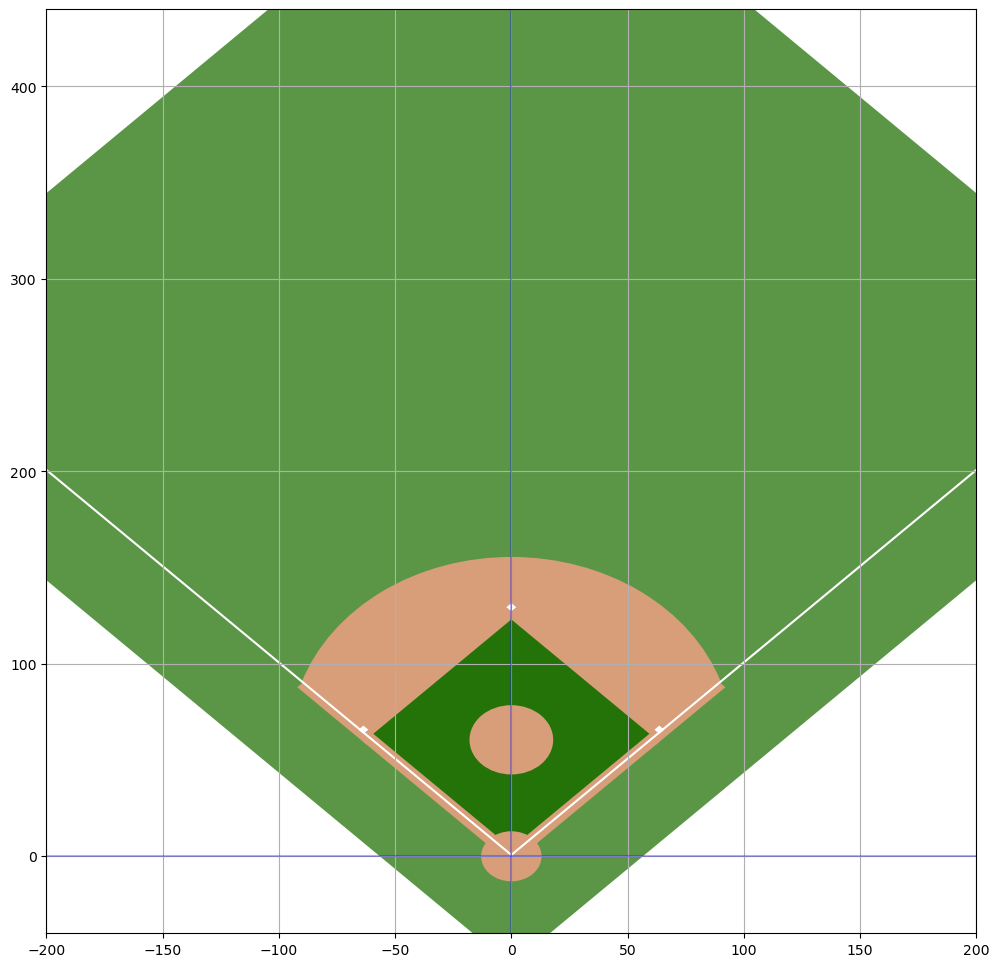

In [19]:
bf = Baseball_Field(which_game="1903_01_TeamNE_TeamA2")

In [20]:
# bf.create_gif(play_id=203)

In [21]:
bf.game_obj.new_ball_pos.loc[bf.game_obj.new_ball_pos["play_id"] == 203]

,game_str,play_id,timestamp,ball_position_x,ball_position_y,ball_position_z,lag_1_timestamp,lag_1_ball_position_x,lag_1_ball_position_y,lag_1_ball_position_z,diff_timestamp,diff_ball_position_x,diff_ball_position_y,diff_ball_position_z,ball_velo_x,ball_velo_y,ball_velo_z
8133,1903_01_TeamNE_TeamA2,203,6587493,-2.417103,54.5589,6.319860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8134,1903_01_TeamNE_TeamA2,203,6587526,-2.219592,50.2989,6.198480,6587493.0,-2.417103,54.5589,6.319860,33.0,0.197511,-4.2600,-0.121380,5.985182,-129.090909,-3.678182
8135,1903_01_TeamNE_TeamA2,203,6587559,-2.021133,46.0650,6.048660,6587526.0,-2.219592,50.2989,6.198480,33.0,0.198459,-4.2339,-0.149820,6.013909,-128.300000,-4.540000
8136,1903_01_TeamNE_TeamA2,203,6587592,-1.821723,41.8572,5.870370,6587559.0,-2.021133,46.0650,6.048660,33.0,0.199410,-4.2078,-0.178290,6.042727,-127.509091,-5.402727
8137,1903_01_TeamNE_TeamA2,203,6587625,-1.621362,37.6758,5.663640,6587592.0,-1.821723,41.8572,5.870370,33.0,0.200361,-4.1814,-0.206730,6.071545,-126.709091,-6.264545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8254,1903_01_TeamNE_TeamA2,203,6592740,80.280600,72.3999,2.329707,6592707.0,77.240400,72.4773,2.928378,33.0,3.040200,-0.0774,-0.598671,92.127273,-2.345455,-18.141545
8255,1903_01_TeamNE_TeamA2,203,6592773,83.301300,72.3213,1.705146,6592740.0,80.280600,72.3999,2.329707,33.0,3.020700,-0.0786,-0.624561,91.536364,-2.381818,-18.926091
8256,1903_01_TeamNE_TeamA2,203,6592806,86.302200,72.2415,1.054689,6592773.0,83.301300,72.3213,1.705146,33.0,3.000900,-0.0798,-0.650457,90.936364,-2.418182,-19.710818
8257,1903_01_TeamNE_TeamA2,203,6592839,89.283600,72.1605,0.378333,6592806.0,86.302200,72.2415,1.054689,33.0,2.981400,-0.0810,-0.676356,90.345455,-2.454545,-20.495636


### Try plotting a play!

In [22]:
# ball thrown
# play_id=203, timestamp=6591420 # first bounce: 6587955

play_id=10
timestamp= None#6590133# 5435166 # 6591420

bf.clear_plot()



bf.add_fielders_to_plot(play_id=play_id, timestamp=timestamp, show_velos=True)
bf.add_batters_to_plot(play_id=play_id, timestamp=timestamp, show_velos=False)
bf.add_ball_to_plot(play_id=play_id, timestamp=timestamp, show_velos=False)

bf.add_event_annotations(play_id=play_id, timestamp=timestamp)


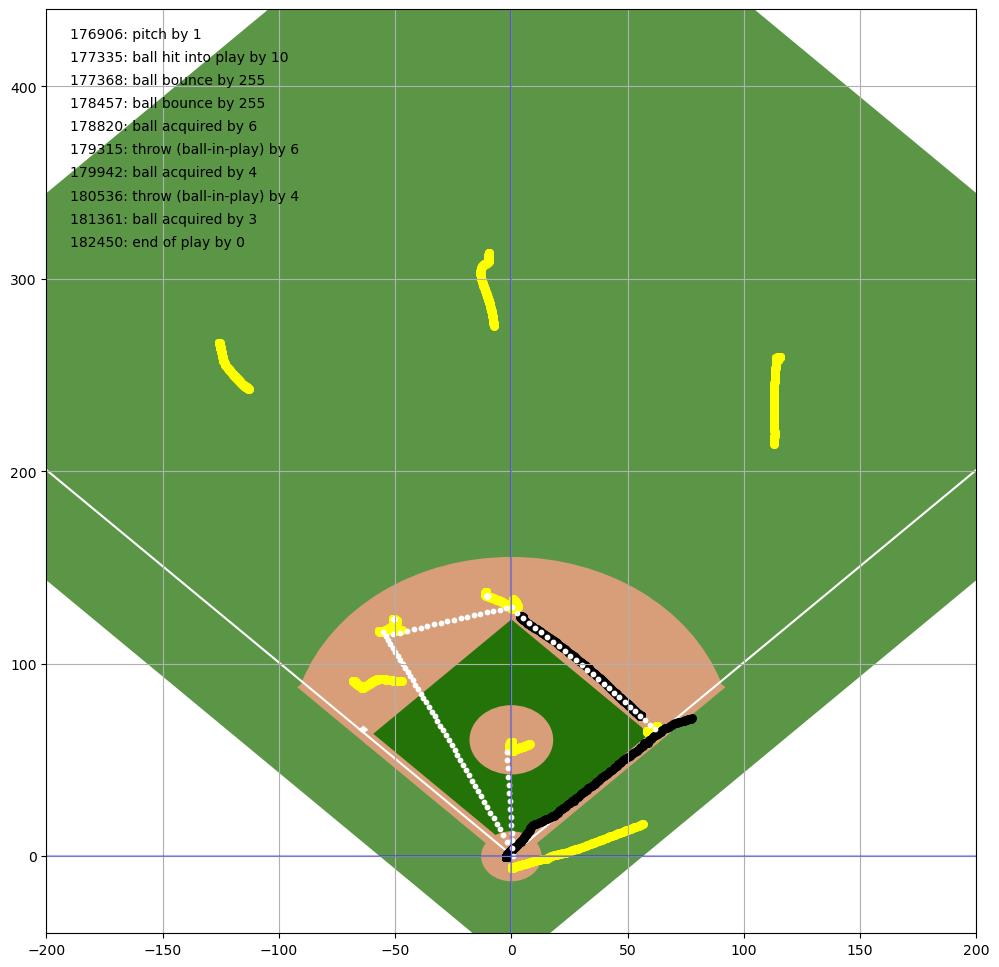

In [23]:
bf.fig

In [181]:
bf.create_gif(play_id=10)

MovieWriter ffmpeg unavailable; using Pillow instead.


## Before I call this new object is done:
- ~~plot all events as a list of text going down the side for just play_id~~
- ~~need to implement frame_index, so I can use that for the gif~~
- ~~make a "create gif" function~~
- need to figure out how to share the ball and player acquired data, and keep the events up
    - My current thought here is that this should happen elsewhere, maybe in the Game class, when I implement more smoothing and other stuff too


In [47]:
play_num = 203

this_play_player_pos =  player_pos.loc[(player_pos["play_id"] == play_num) &
               (player_pos["player_position"] >= 1) &
               (player_pos["player_position"] <= 13), :] 


this_play_player_pos

,game_str,play_id,timestamp,player_position,field_x,field_y
382253,1903_01_TeamNE_TeamA2,203,6587493,1,0.1332,59.3541
382254,1903_01_TeamNE_TeamA2,203,6587526,1,0.1257,59.3484
382255,1903_01_TeamNE_TeamA2,203,6587559,1,0.1185,59.3430
382256,1903_01_TeamNE_TeamA2,203,6587592,1,0.1113,59.3373
382257,1903_01_TeamNE_TeamA2,203,6587625,1,0.1044,59.3316
...,...,...,...,...,...,...
385863,1903_01_TeamNE_TeamA2,203,6598185,11,-29.9370,105.0708
385864,1903_01_TeamNE_TeamA2,203,6598218,11,-30.4224,104.6733
385865,1903_01_TeamNE_TeamA2,203,6598251,11,-30.9159,104.2902
385866,1903_01_TeamNE_TeamA2,203,6598284,11,-31.3905,103.9332


In [48]:
this_play_player_pos["timestamp"].value_counts()

#player_pos["player_position"].unique()

6587493    11
6594225    11
6594819    11
6594786    11
6594753    11
           ..
6590925    11
6597921    10
6597888    10
6597855    10
6597954    10
Name: timestamp, Length: 329, dtype: int64

In [52]:
this_play_player_pos.groupby("player_position")["timestamp"].diff().describe()

count    3604.000000
mean       33.036626
std         2.198779
min        33.000000
25%        33.000000
50%        33.000000
75%        33.000000
max       165.000000
Name: timestamp, dtype: float64

In [54]:
this_play_player_pos[this_play_player_pos["timestamp"] == 6597921]

,game_str,play_id,timestamp,player_position,field_x,field_y
382569,1903_01_TeamNE_TeamA2,203,6597921,1,0.5052,49.6428
382898,1903_01_TeamNE_TeamA2,203,6597921,2,58.6092,25.9665
383227,1903_01_TeamNE_TeamA2,203,6597921,3,87.8088,91.7841
383556,1903_01_TeamNE_TeamA2,203,6597921,4,-0.5955,131.6343
383885,1903_01_TeamNE_TeamA2,203,6597921,5,-49.2732,73.3941
384214,1903_01_TeamNE_TeamA2,203,6597921,6,-51.7611,105.8157
384543,1903_01_TeamNE_TeamA2,203,6597921,7,-116.7741,244.9176
384872,1903_01_TeamNE_TeamA2,203,6597921,8,13.9776,272.4900
385201,1903_01_TeamNE_TeamA2,203,6597921,9,142.4124,184.4895
385530,1903_01_TeamNE_TeamA2,203,6597921,10,85.7967,80.5818


In [57]:
this_play_player_pos[this_play_player_pos["timestamp"] == 6597921 + 2 * 33]

,game_str,play_id,timestamp,player_position,field_x,field_y
382571,1903_01_TeamNE_TeamA2,203,6597987,1,0.4998,49.6494
382900,1903_01_TeamNE_TeamA2,203,6597987,2,59.1438,26.3379
383229,1903_01_TeamNE_TeamA2,203,6597987,3,88.6401,92.3862
383558,1903_01_TeamNE_TeamA2,203,6597987,4,-0.5481,131.5935
383887,1903_01_TeamNE_TeamA2,203,6597987,5,-49.2648,73.3851
384216,1903_01_TeamNE_TeamA2,203,6597987,6,-51.6249,105.7587
384545,1903_01_TeamNE_TeamA2,203,6597987,7,-116.9427,244.3113
384874,1903_01_TeamNE_TeamA2,203,6597987,8,13.9131,272.2413
385203,1903_01_TeamNE_TeamA2,203,6597987,9,142.6689,183.6243
385532,1903_01_TeamNE_TeamA2,203,6597987,10,85.9938,80.8230
